## EDA cho dữ liệu product 

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
df_order_pds_prior = pd.read_csv("C:\DA08\data\order_products__prior.csv", 
                                 low_memory=False)
df_order_pds_prior

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0
...,...,...,...,...
32434484,3421083,39678,6,1
32434485,3421083,11352,7,0
32434486,3421083,4600,8,0
32434487,3421083,24852,9,1


In [9]:
df_products = pd.read_csv("C:\DA08\data\products.csv", 
                          low_memory=False)
df_products

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13
...,...,...,...,...
49683,49684,"Vodka, Triple Distilled, Twist of Vanilla",124,5
49684,49685,En Croute Roast Hazelnut Cranberry,42,1
49685,49686,Artisan Baguette,112,3
49686,49687,Smartblend Healthy Metabolism Dry Cat Food,41,8


In [10]:
df_merge_products = pd.merge(df_order_pds_prior, df_products)
df_merge_products

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id
0,2,33120,1,1,Organic Egg Whites,86,16
1,26,33120,5,0,Organic Egg Whites,86,16
2,120,33120,13,0,Organic Egg Whites,86,16
3,327,33120,5,1,Organic Egg Whites,86,16
4,390,33120,28,1,Organic Egg Whites,86,16
...,...,...,...,...,...,...,...
32434484,3265099,43492,3,0,Gourmet Burger Seasoning,104,13
32434485,3361945,43492,19,0,Gourmet Burger Seasoning,104,13
32434486,3267201,33097,2,0,Piquillo & Jalapeno Bruschetta,81,15
32434487,3393151,38977,32,0,Original Jerky,100,21


### 10 sản phẩm được bán nhiếu nhất

In [11]:
top10_product_bestseller = df_merge_products['product_name'].value_counts().nlargest(10)
top10_product_bestseller

Banana                    472565
Bag of Organic Bananas    379450
Organic Strawberries      264683
Organic Baby Spinach      241921
Organic Hass Avocado      213584
Organic Avocado           176815
Large Lemon               152657
Strawberries              142951
Limes                     140627
Organic Whole Milk        137905
Name: product_name, dtype: int64

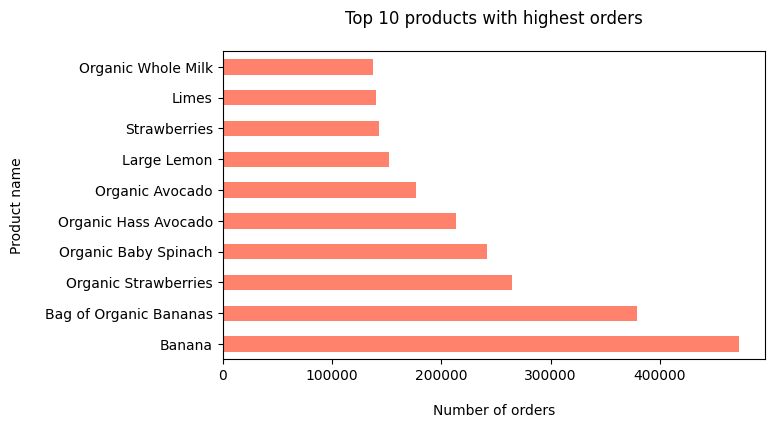

In [12]:
ax = top10_product_bestseller.plot(kind='barh', stacked=False, 
                                   rot=0, color='tomato', alpha=0.8, 
                                   figsize=(7,4))
plt.xlabel('Number of orders', labelpad=15)
plt.ylabel('Product name', labelpad=15)
plt.title('Top 10 products with highest orders', pad=20)
plt.show;

### 10 sản phẩm được reorder nhiều nhất

In [13]:
reorder_product = df_merge_products[df_merge_products['reordered']==1]
reorder_product

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id
0,2,33120,1,1,Organic Egg Whites,86,16
3,327,33120,5,1,Organic Egg Whites,86,16
4,390,33120,28,1,Organic Egg Whites,86,16
5,537,33120,2,1,Organic Egg Whites,86,16
6,582,33120,7,1,Organic Egg Whites,86,16
...,...,...,...,...,...,...,...
32434344,3367810,29232,1,1,Garlic Bologna,100,21
32434360,2647083,34177,19,1,Traditional Clean Energy Drink,94,7
32434430,2962132,23269,1,1,Sheer Volume Shampoo & Conditioner,22,11
32434431,3337053,23269,15,1,Sheer Volume Shampoo & Conditioner,22,11


In [14]:
top10_product_reordered = reorder_product['product_name'].value_counts().nlargest(10)
top10_product_reordered

Banana                    398609
Bag of Organic Bananas    315913
Organic Strawberries      205845
Organic Baby Spinach      186884
Organic Hass Avocado      170131
Organic Avocado           134044
Organic Whole Milk        114510
Large Lemon               106255
Organic Raspberries       105409
Strawberries               99802
Name: product_name, dtype: int64

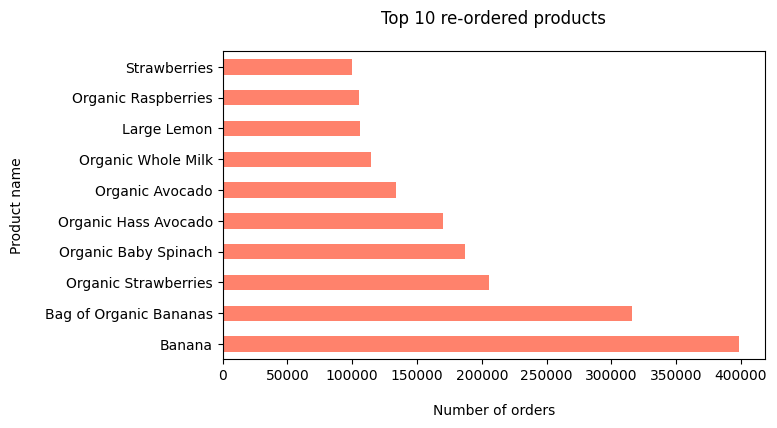

In [15]:
x = top10_product_reordered.plot(kind='barh', stacked=False, 
                                  rot=0, color='tomato', alpha=0.8, 
                                  figsize=(7,4))
plt.xlabel('Number of orders', labelpad=15)
plt.ylabel('Product name', labelpad=15)
plt.title('Top 10 re-ordered products', pad=20)
plt.show;

### Số lượng sản phẩm bán được, thống kê theo từng department

In [17]:
df_departments = pd.read_csv("C:\DA08\data\departments.csv", 
                            low_memory=False)
df_departments

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


In [18]:
df_merge_products1 = pd.merge(df_order_pds_prior, df_products)
df_merge_products1

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id
0,2,33120,1,1,Organic Egg Whites,86,16
1,26,33120,5,0,Organic Egg Whites,86,16
2,120,33120,13,0,Organic Egg Whites,86,16
3,327,33120,5,1,Organic Egg Whites,86,16
4,390,33120,28,1,Organic Egg Whites,86,16
...,...,...,...,...,...,...,...
32434484,3265099,43492,3,0,Gourmet Burger Seasoning,104,13
32434485,3361945,43492,19,0,Gourmet Burger Seasoning,104,13
32434486,3267201,33097,2,0,Piquillo & Jalapeno Bruschetta,81,15
32434487,3393151,38977,32,0,Original Jerky,100,21


In [19]:
df_merge_products2 = pd.merge(df_merge_products1, df_departments)
df_merge_products2

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,department
0,2,33120,1,1,Organic Egg Whites,86,16,dairy eggs
1,26,33120,5,0,Organic Egg Whites,86,16,dairy eggs
2,120,33120,13,0,Organic Egg Whites,86,16,dairy eggs
3,327,33120,5,1,Organic Egg Whites,86,16,dairy eggs
4,390,33120,28,1,Organic Egg Whites,86,16,dairy eggs
...,...,...,...,...,...,...,...,...
32434484,2882701,21581,8,0,Doc McStuffins Adhesive Bandages,6,2,other
32434485,2909991,18001,5,0,Dried Porcini Mushroom,6,2,other
32434486,3016581,46404,1,1,Cotes De Provence Rose,6,2,other
32434487,3326955,46404,1,0,Cotes De Provence Rose,6,2,other


In [20]:
count_pd_dp = df_merge_products2['department'].value_counts()
count_pd_dp

produce            9479291
dairy eggs         5414016
snacks             2887550
beverages          2690129
frozen             2236432
pantry             1875577
bakery             1176787
canned goods       1068058
deli               1051249
dry goods pasta     866627
household           738666
breakfast           709569
meat seafood        708931
personal care       447123
babies              423802
international       269253
alcohol             153696
pets                 97724
missing              69145
other                36291
bulk                 34573
Name: department, dtype: int64

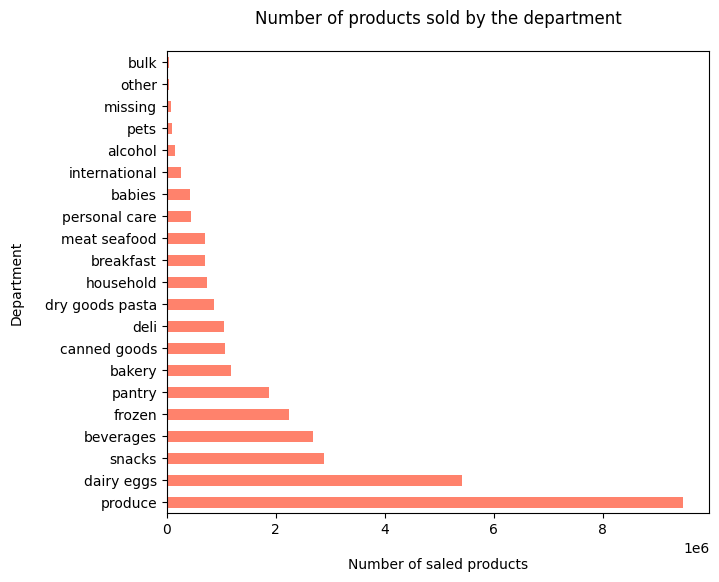

In [21]:
ax = count_pd_dp.plot(kind='barh', stacked=False, 
                      rot=0, color='tomato', alpha=0.8, 
                      figsize=(7,6))
plt.xlabel('Number of saled products', labelpad=15)
plt.ylabel('Department', labelpad=15)
plt.title('Number of products sold by the department', pad=20)
plt.show;

In [26]:
import squarify

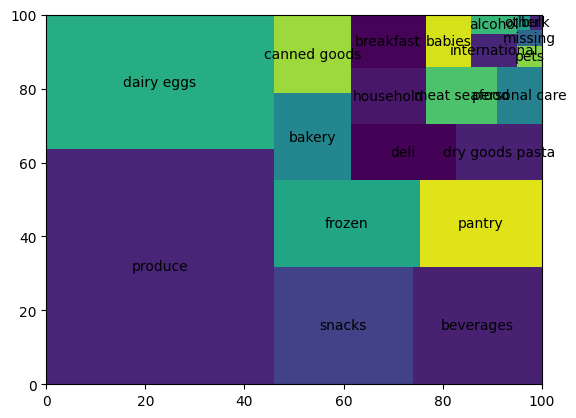

In [27]:
squarify.plot(count_pd_dp,
             label = count_pd_dp.index)
plt.show();